Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2021/2022  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2021 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **24. listopada 2021. u 23:59h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od četiri zadatka, te tri dodatna zadatka koji se **ne boduju**. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [4]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [5]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [6]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(1)
fi = poly.fit_transform(X)
fi

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [4]:
from numpy import linalg

w = linalg.inv(fi.T@fi)@fi.T@y
w_linalg = linalg.pinv(fi)@y

print(w)
print(w_linalg)

[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [5]:
from sklearn.metrics import mean_squared_error

y_pred = w@fi.T
print("Predivđene oznake: " + str(y_pred))
print("Stvarne oznake: " + str(y))


msq = mean_squared_error(y, y_pred)
print("Pogreška: " + str(msq))

Predivđene oznake: [2.2        2.65714286 3.11428571 4.02857143]
Stvarne oznake: [4 1 2 5]
Pogreška: 2.042857142857143


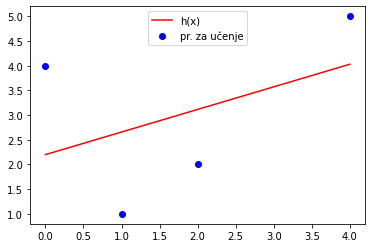

In [6]:
plt.scatter(X, y, label = "pr. za učenje", c = "b")
plt.plot(X, y_pred, label = "h(x)", c = "r")
plt.legend(loc = "upper center")
plt.show()

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [7]:
print("Dimenzije matrice 𝚽: " + str(np.shape(fi)))
print("Rang matrice 𝚽: " + str(linalg.matrix_rank(fi)))

try:
    linalg.inv(fi)
except:
    print("Matrica nije kvadratna!")

Dimenzije matrice 𝚽: (4, 2)
Rang matrice 𝚽: 2
Matrica nije kvadratna!


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [8]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)
print("w0: " + str(reg.intercept_))
print("w1: " + str(reg.coef_))
print()
print("Predviđene oznake putem klase LinearRegression: " + str(reg.predict(X)))
print("Previđene oznake vlastitim računom: " + str(y_pred))
print()
print("Pogreška predviđanja klasom LinearRegression: " + str(mean_squared_error(y, reg.predict(X))))
print("Pogreška predivđanja vlastitim računom: " + str(msq))

w0: 2.2
w1: [0.45714286]

Predviđene oznake putem klase LinearRegression: [2.2        2.65714286 3.11428571 4.02857143]
Previđene oznake vlastitim računom: [2.2        2.65714286 3.11428571 4.02857143]

Pogreška predviđanja klasom LinearRegression: 2.042857142857143
Pogreška predivđanja vlastitim računom: 2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [9]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    dim = np.shape(f)[0] - 1 
    poly = PolynomialFeatures(dim)
    X_pow = poly.fit_transform(X)
    y = X_pow@f + noise
    return y

In [10]:
def make_instances(x1, x2, N):
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [11]:
X2 = make_instances(-5, 5, 50)
f = np.array([5, 1, -2, -5])
sigma = 200
noise = normal(0, sigma, 50)
y = make_labels(X2, f, noise)
print(y)

[ 713.78531971  478.51978958  267.83225323  616.39517819  970.64935006
  465.05981996  257.374242    183.38661464  327.26913766  176.21660057
 -237.48144699  -20.63637983  541.6239629    16.20306363   63.13006186
  503.96248766 -286.35641977   68.69539201   22.55714207  362.22899044
  123.45033334  -89.46074991 -201.66442552  246.04221131 -392.05754474
  -99.25619354  110.40784825   29.43145864  148.29536027   51.90529489
  -46.34302085 -365.7804415    70.05013649  177.75201532  -26.86825786
 -105.58196689  -92.38096285 -336.93455641 -616.72468623   98.10855323
 -123.24347195  -89.04410466 -331.1089795  -444.96074284 -538.755578
 -121.31718497 -419.43462811 -628.3051058  -705.49089145 -562.8331426 ]


Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

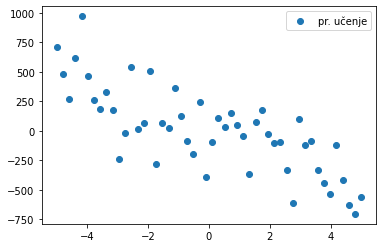

In [12]:
plt.scatter(X2, y, label = "pr. učenje")
plt.legend(loc="upper right")
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

Predviđeni parametri: [ -0.78569551 -27.62848422   0.57092842  -4.23131422]
Predviđene vrijednosti:
[ 680.54421362  611.60685698  547.78820431  488.87246215  434.64383703
  384.88653549  339.38476406  297.92272928  260.28463768  226.2546958
  195.61711018  168.15608735  143.65583384  121.90055619  102.67446093
   85.76175461   70.94664376   58.0133349    46.74603459   36.92894934
   28.34628571   20.78225022   14.02104941    7.84688981    2.04397796
   -3.6034796    -9.31127634  -15.29520572  -21.77106122  -28.95463628
  -37.06172439  -46.30811899  -56.90961356  -69.08200157  -83.04107647
  -99.00263173 -117.18246081 -137.79635719 -161.06011432 -187.18952567
 -216.4003847  -248.90848488 -284.92961967 -324.67958254 -368.37416696
 -416.22916638 -468.46037427 -525.28358409 -586.91458932 -653.56918341]

Pogreška učenja: 45839.596931686254


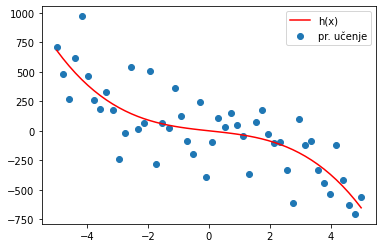

In [13]:
fi = PolynomialFeatures(3).fit_transform(X2)

w = linalg.pinv(fi)@y
print("Predviđeni parametri: " + str(w))

y_pred = w@fi.transpose()
print("Predviđene vrijednosti:\n" + str(y_pred))

mse = mean_squared_error(y, y_pred)
print("\nPogreška učenja: " + str(mse))

plt.scatter(X2, y, label="pr. učenje")
plt.plot(X2, y_pred, label ="h(x)", c="r")
plt.legend(loc="upper right")
plt.show()

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

In [14]:
def transformDataset(X, d):
    poly = PolynomialFeatures(d)
    fi = poly.fit_transform(X)
    return fi

def train(X, y, d):
    fi = transformDataset(X, d)
    w = linalg.pinv(fi)@y
    return w

def predict(X, d, w):
    fi = transformDataset(X, d)
    y_pred = w@fi.T
    return y_pred
    

Greška za d=1: 53037.14363399391


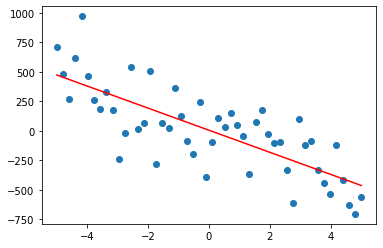

Greška za d=3: 45839.596931686254


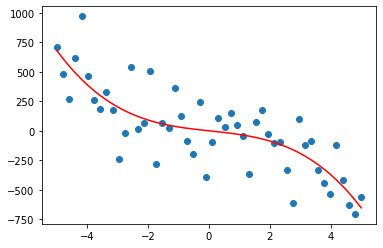

Greška za d=5: 45775.105494724965


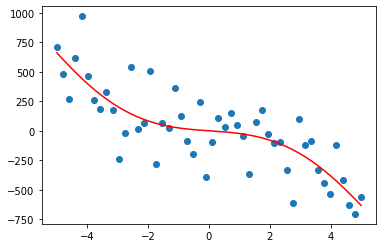

Greška za d=10: 41620.34293164937


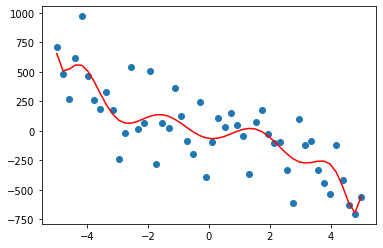

Greška za d=20: 29772.127497317408


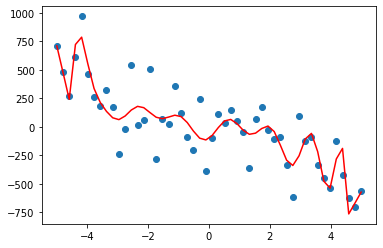

In [15]:
for d in [1, 3, 5, 10, 20]:
    w = train(X2, y, d)
    y3_pred = predict(X2, d, w)
    error = mean_squared_error(y, y3_pred)
    print("Greška za d=" + str(d) + ": " + str(error))
    plt.plot(X2, y3_pred, label="D: " + str(d), c = "r")
    plt.scatter(X2, y)
    plt.show()


### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

In [16]:
def calculateErrors(X_train, y_train, X_test, y_test, D):
    err_train = []
    err_test = []
    for d in D:
        w = train(X_train, y_train, d)
        y_train_predict = predict(X_train, d, w)
        y_test_predict = predict(X_test, d, w)
        err_train.append(mean_squared_error(y_train, y_train_predict))
        err_test.append(mean_squared_error(y_test, y_test_predict))
        
    return err_train, err_test

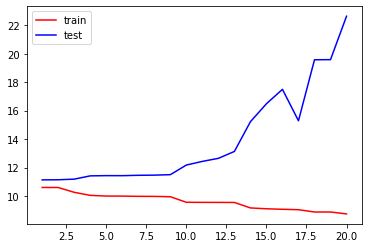

In [17]:
from sklearn.model_selection import train_test_split

D = []
for i in range(1, 21):
    D.append(i)


X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.5, random_state = 42)


err_train, err_test = calculateErrors(X_train, y_train, X_test, y_test, D)

plt.plot(D, [log(x) for x in err_train], label="train", c="r")
plt.plot(D, [log(x) for x in err_test], label="test",c="b")
plt.legend(loc="upper left")
plt.show()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

In [18]:
def createDatasetsWithNoise(X, f, sigma):
    datasets = []
    labels = []
    
    for s in sigma:
        lenX = np.shape(X)[0]
        noise = normal(0, s, lenX)
        y = make_labels(X, f, noise)
        
        indexes = np.random.choice(lenX, lenX//3, replace = False)
        datasets.append(X[indexes])
        labels.append(y[indexes])
        
        indexes = np.random.choice(lenX, lenX * 2//3, replace = False)
        datasets.append(X[indexes])
        labels.append(y[indexes])
        
        datasets.append(X)
        labels.append(y)
    
    return datasets, labels

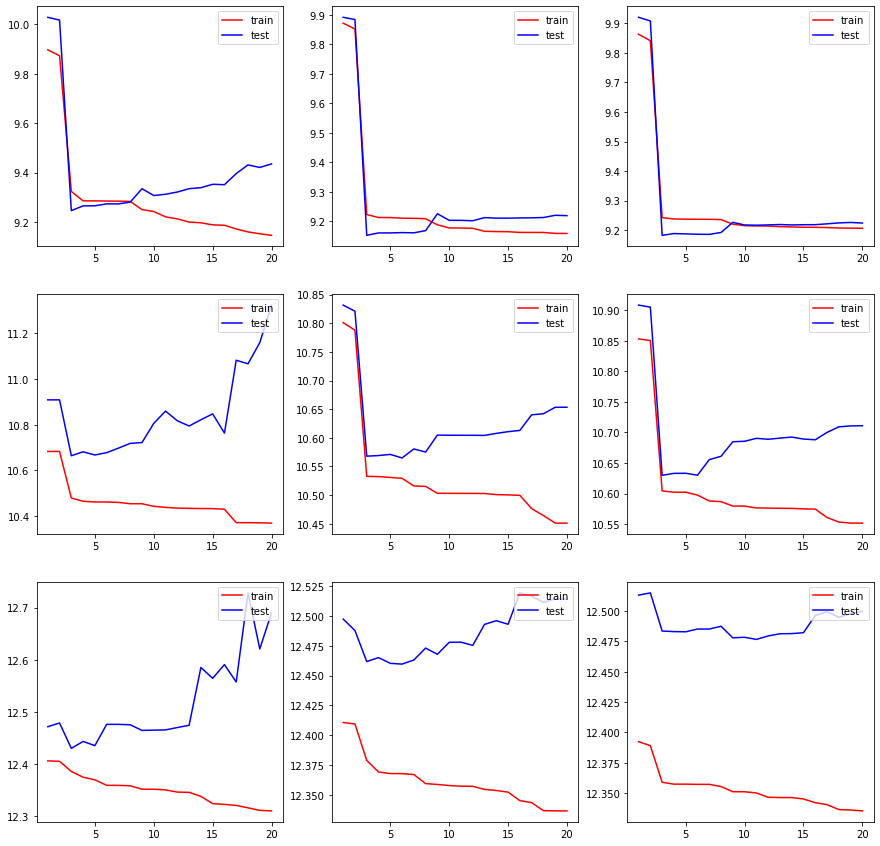

In [19]:
X = make_instances(-5, 5, 1000)
f = np.array([5, 1, -2, -5])
sigma = [100, 200, 500]


X_train, X_test = train_test_split(X, test_size = 0.5, random_state = 42)

train_datasets, train_labels = createDatasetsWithNoise(X_train, f, sigma)
test_datasets, test_labels = createDatasetsWithNoise(X_test, f, sigma)

for i in range(0, len(train_datasets)):
    plt.subplot(3, 3, i + 1)
    err_train, err_test = calculateErrors(train_datasets[i], train_labels[i], test_datasets[i], test_labels[i], D)
    plt.plot(D, [log(x) for x in err_train], label="train",c="r")
    plt.plot(D, [log(x) for x in err_test], label="test",c="b")
    plt.legend(loc = "upper right")

plt.gcf().set_size_inches(15, 15)
plt.show()


***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [22]:
fi4 = PolynomialFeatures(3).fit_transform(X)
w = []
lambdas = [0, 1, 10]

for i in lambdas:
    w_tmp = linalg.inv(fi4.T@fi4 + i * np.identity(np.shape(fi4)[1]))@fi4.T@y
    w.append(w_tmp)
w

[array([ 4.        , -5.91666667,  3.375     , -0.45833333]),
 array([ 1.79567372, -0.24729075, -0.0175289 ,  0.07014758]),
 array([0.43312265, 0.11060671, 0.13827839, 0.03093411])]

### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [23]:
from sklearn.linear_model import Ridge

for l in lambdas:
    ridge = Ridge(l)
    ridge.fit(fi4, y)
    ridge.coef_[0] = ridge.intercept_
    print(ridge.coef_)

[ 4.         -5.91666667  3.375      -0.45833333]
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

In [24]:
def trainWithLambda(X, y, d, lamb):
    fi = PolynomialFeatures(d).fit_transform(X)
    return linalg.inv(fi.T@fi + lamb * np.identity(np.shape(fi)[1]))@fi.T@y

In [29]:
X4 = make_instances(-5, 5, 50)
f = np.array([5, 1, -2, -5])
sigma = 200
noise = normal(0, sigma, 50)
y = make_labels(X4, f, noise)


Lambda: 0, d = 2.


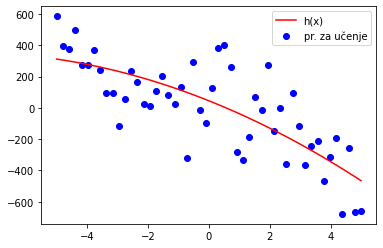

Lambda: 100, d = 2.


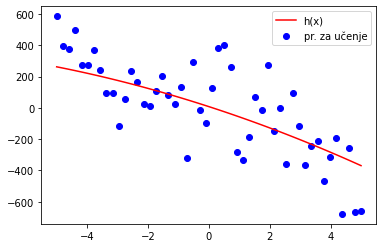

Lambda: 0, d = 10.


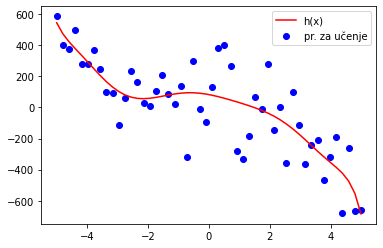

Lambda: 100, d = 10.


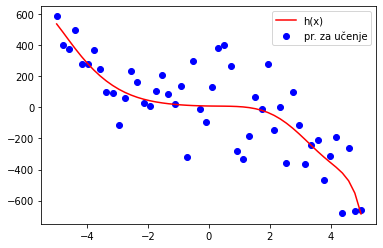

In [30]:
for d in [2, 10]:
    for l in [0, 100]:
        w = trainWithLambda(X4, y, d, l)
        y_pred = predict(X4, d, w)
        print("Lambda: " + str(l) +", d = " + str(d) + ".")
        plt.scatter(X4, y, label = "pr. za učenje", c = "b")
        plt.plot(X4, y_pred, label = "h(x)", c = "r")
        plt.legend(loc = "upper right")
        plt.show()


### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


In [27]:
def calculateErrorsWithLambda(X_train, y_train, X_test, y_test, D, lambdas):
    err_train = []
    err_test = []
    for l in lambdas:
        w = trainWithLambda(X_train, y_train, D, l)
        y_train_predict = predict(X_train, D, w)
        y_test_predict = predict(X_test, D, w)
        err_train.append(mean_squared_error(y_train, y_train_predict))
        err_test.append(mean_squared_error(y_test, y_test_predict))
        
    return err_train, err_test

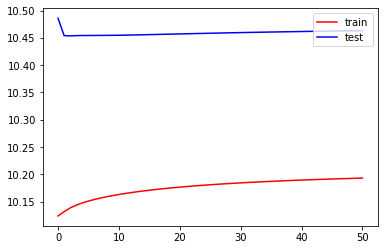

In [31]:
d = 10
max_lambda = 50
lambdas = []
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size = 0.5, random_state = 42)

for l in range(0, max_lambda + 1):
    lambdas.append(l)

err_train, err_test = calculateErrorsWithLambda(X_train, y_train, X_test, y_test, d, lambdas)

plt.plot(lambdas, [log(x) for x in err_train], label="train",c="r")
plt.plot(lambdas, [log(x) for x in err_test], label="test",c="b")
plt.legend(loc = "upper right")
plt.show()

## Dodatni zadatci

Zadatci u nastavku (označeni zvjezdicom) nisu dio obaveznog dijela laboratorijske vježbe, niti nose bonus bodove. Dakle, nije ih potrebno riješiti kako biste ostvarili 100% bodova na ovoj laboratorijskoj vježbi. Međutim, preporučamo vam da ih pokušate riješiti i na terminu predaje prodiskutirate svoja rješenja s asistentima.

### *5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [ ]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

In [ ]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

In [ ]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje

### *6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [ ]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

In [ ]:
# Vaš kôd ovdje

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [ ]:
# Vaš kôd ovdje

Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [ ]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje

**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### *7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [ ]:
# Vaš kôd ovdje

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [ ]:
# Vaš kôd ovdje

**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [ ]:
# Vaš kôd ovdje

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.